# Импорт библиотек

In [ ]:
# Импорт общих библиотек
import pandas as pd
import numpy as np


# Масштабирование

from sklearn.preprocessing import MinMaxScaler, StandardScaler


# Импорт библиотек для графической визуализации данных
import seaborn as sns
import matplotlib.pyplot as plt

# PCA
from sklearn.decomposition import PCA


# Импорт предобработанных данных

In [ ]:
!git clone https://github.com/usmaxnik-rgb/VKR_UMN_Modul_Predict

In [ ]:
X_united_full=pd.read_excel('/content/VKR_UMN_Modul_Predict/X_united_full.xlsx', index_col='Index')

In [4]:
X_united_full.columns

Index(['Угол нашивки, град', 'Шаг нашивки', 'Плотность нашивки',
       'Соотношение матрица-наполнитель', 'Плотность, кг/м3',
       'модуль упругости, ГПа', 'Количество отвердителя, м.%',
       'Содержание эпоксидных групп,%_2', 'Температура вспышки, С_2',
       'Поверхностная плотность, г/м2', 'Модуль упругости при растяжении, ГПа',
       'Прочность при растяжении, МПа', 'Потребление смолы, г/м2'],
      dtype='object')

In [5]:
X_united_full.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1015 entries, 0 to 1039
Data columns (total 13 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Угол нашивки, град                    1015 non-null   int64  
 1   Шаг нашивки                           1015 non-null   float64
 2   Плотность нашивки                     1015 non-null   float64
 3   Соотношение матрица-наполнитель       1015 non-null   float64
 4   Плотность, кг/м3                      1015 non-null   float64
 5   модуль упругости, ГПа                 1015 non-null   float64
 6   Количество отвердителя, м.%           1015 non-null   float64
 7   Содержание эпоксидных групп,%_2       1015 non-null   float64
 8   Температура вспышки, С_2              1015 non-null   float64
 9   Поверхностная плотность, г/м2         1015 non-null   float64
 10  Модуль упругости при растяжении, ГПа  1015 non-null   float64
 11  Прочность при растяжен

# Корреляция признаков в объединённом наборе данных после заполнения пропущенных значений

<Axes: >

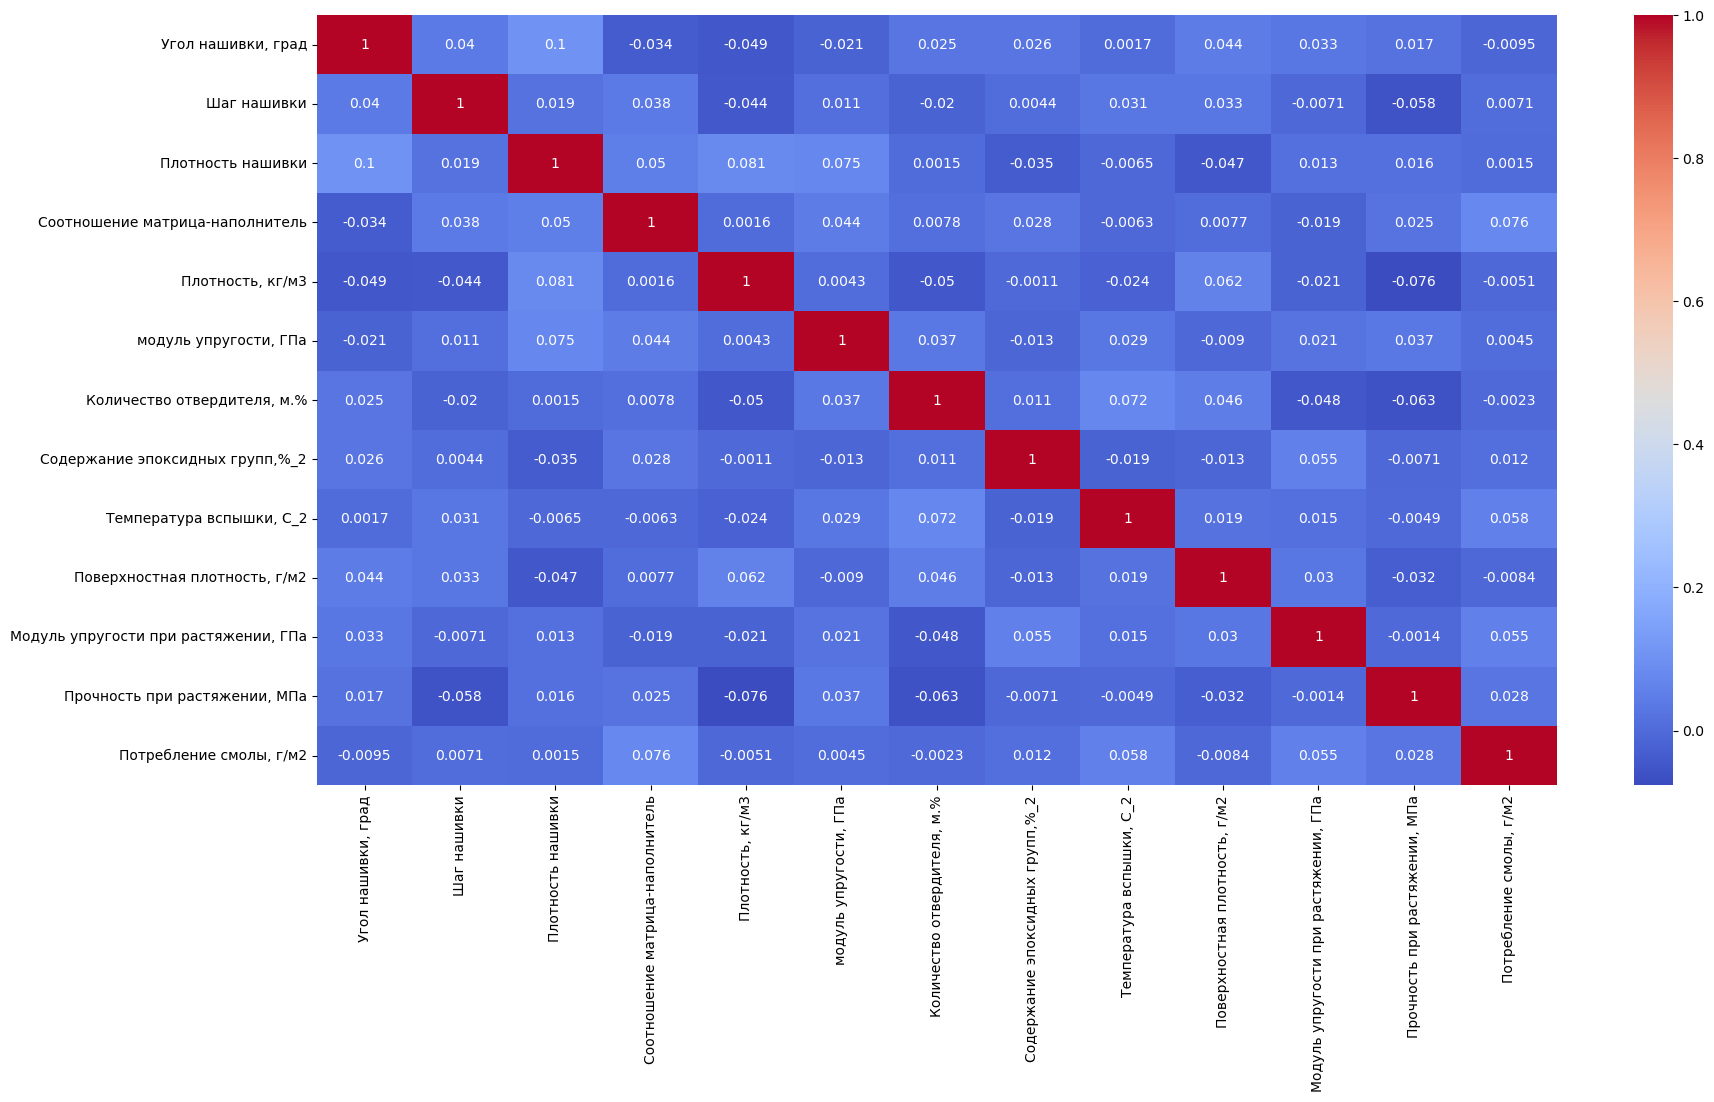

In [6]:
X_united_full_corr=X_united_full.corr()
plt.figure(figsize = (20, 10))
sns.heatmap(X_united_full.corr(), cmap = 'coolwarm',  cbar = True, annot=True)

# Топ K корреляций с целевой переменной 'Модуль упругости при растяжении, ГПа'в объединённом датасете после заполнения пропущенных значений

<Axes: >

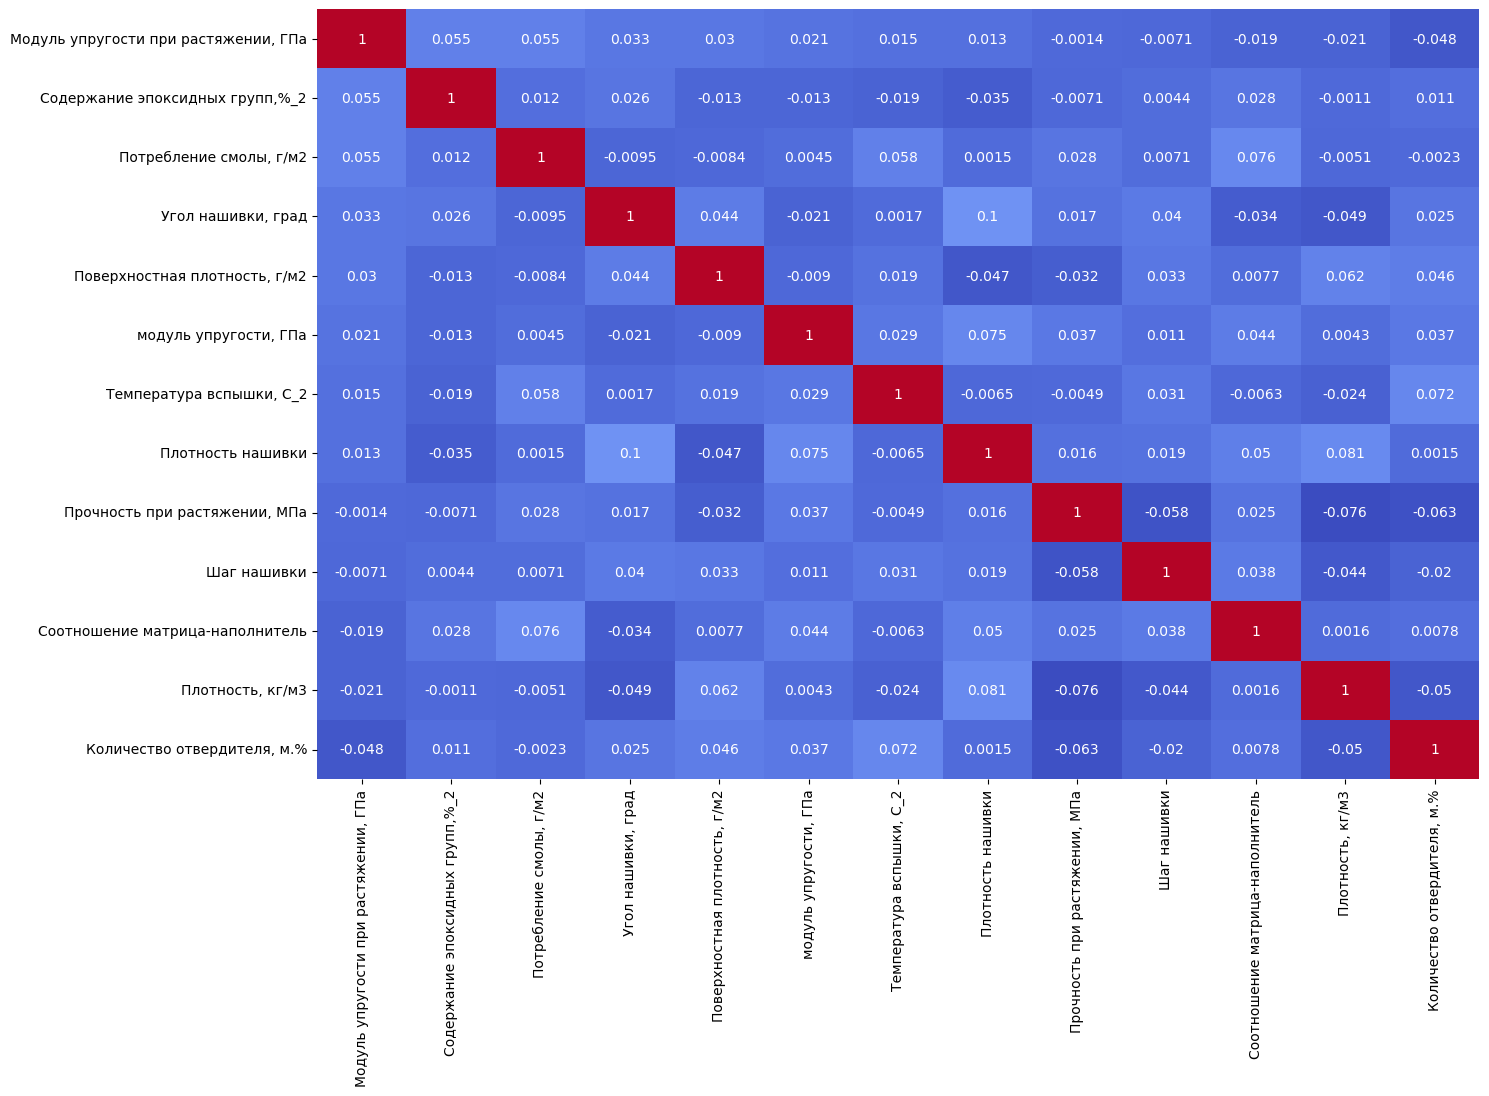

In [7]:
X_united_full_corr=X_united_full.corr()
k = 14
top_corr_features1 = X_united_full_corr.nlargest(k, 'Модуль упругости при растяжении, ГПа')[['Модуль упругости при растяжении, ГПа']]
top_corr_features1

cols_Top_Korr_modul_upr = top_corr_features1.index.to_list() #выдергиваем имена колонок
plt.figure(figsize = (15, 10))
sns.heatmap(X_united_full[cols_Top_Korr_modul_upr].corr(), cmap = 'coolwarm',  cbar = False, annot = True)

# Топ K корреляций с целевой переменной 'Прочность при растяжении, МПа'в объединённом датасете после заполнения пропущенных значений

<Axes: >

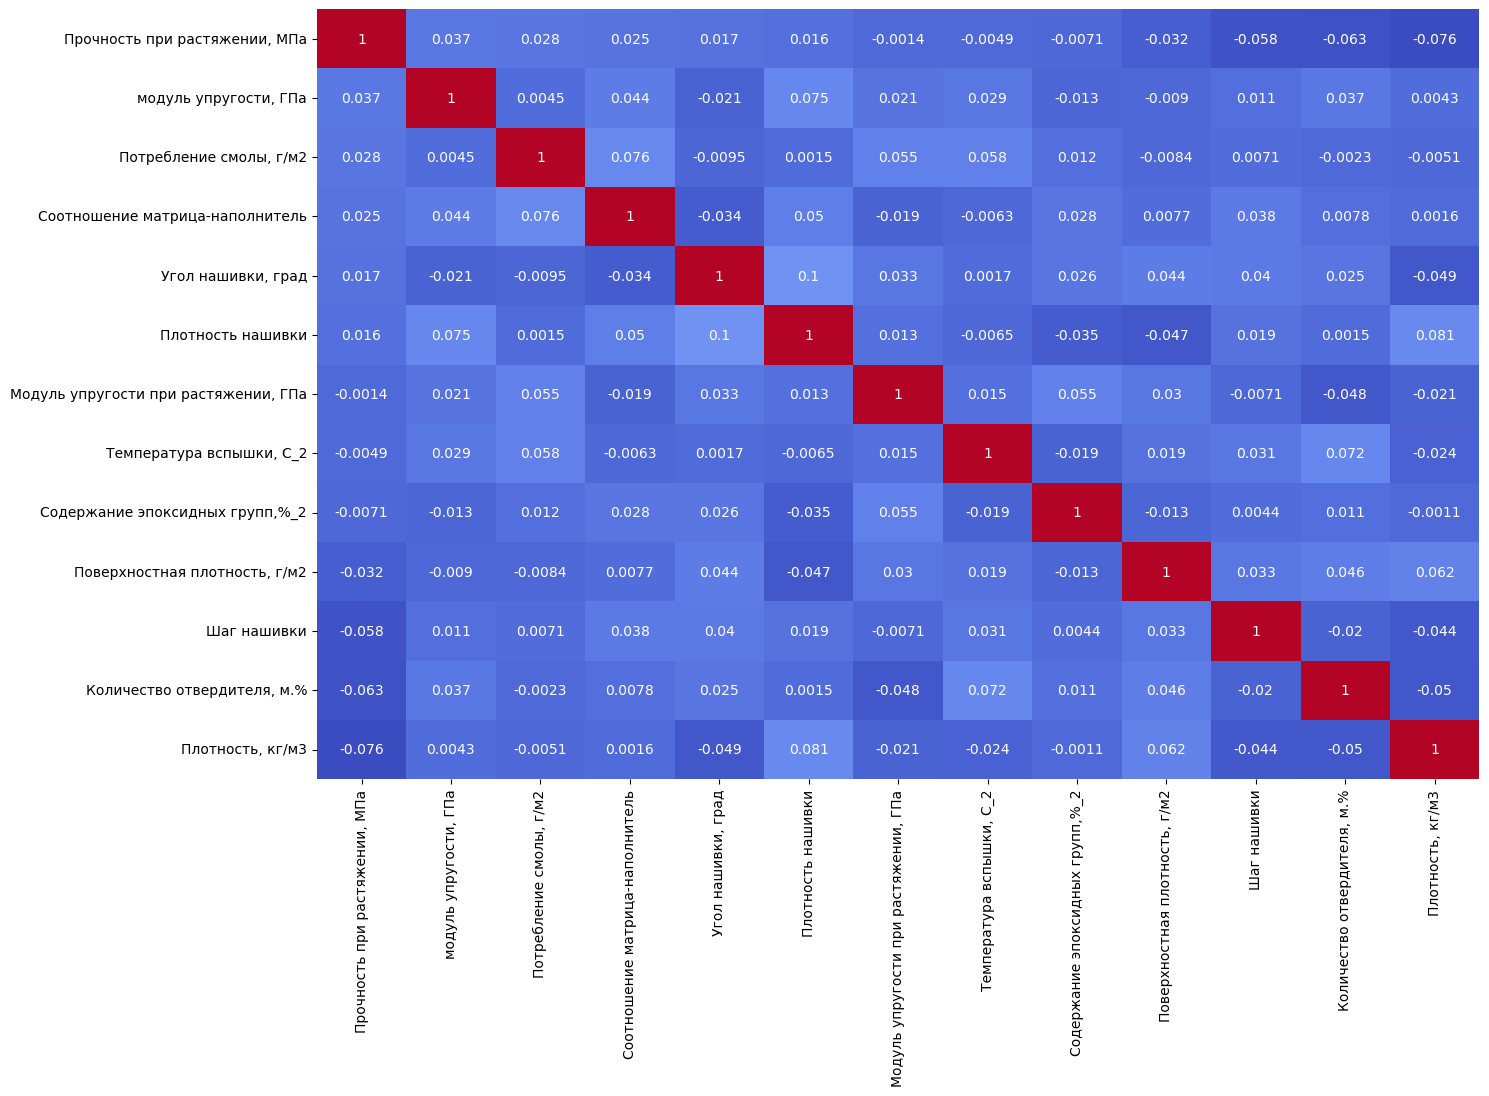

In [8]:
X_united_full_corr=X_united_full.corr()
k = 14
top_corr_features2 = X_united_full_corr.nlargest(k, 'Прочность при растяжении, МПа')[['Прочность при растяжении, МПа']]
top_corr_features2

cols_Top_Korr_Prochnost = top_corr_features2.index.to_list() #выдергиваем имена колонок
plt.figure(figsize = (15, 10))
sns.heatmap(X_united_full[cols_Top_Korr_Prochnost].corr(), cmap = 'coolwarm',  cbar = False, annot = True)

# Топ K корреляций с целевой переменной 'Соотношение матрица-наполнитель'в объединённом датасете после заполнения пропущенных значений

<Axes: >

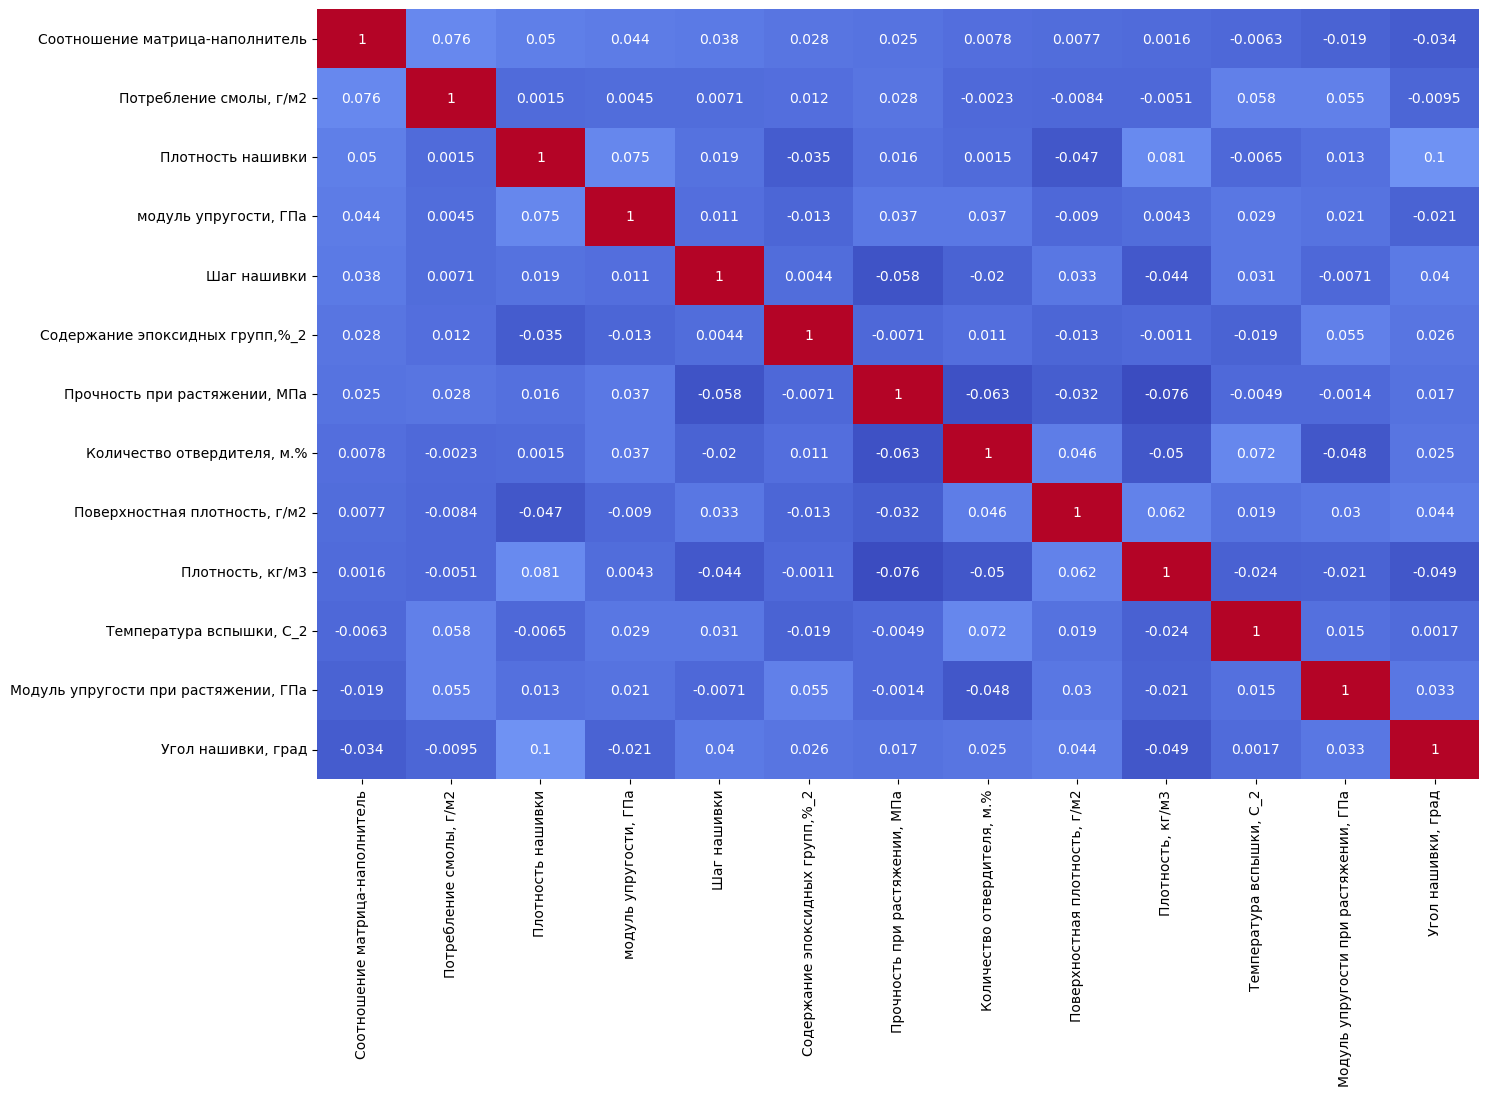

In [9]:
X_united_full_corr=X_united_full.corr()
k = 14
top_corr_features2 = X_united_full_corr.nlargest(k, 'Соотношение матрица-наполнитель')[['Соотношение матрица-наполнитель']]
top_corr_features2

cols_Top_Korr_Prochnost = top_corr_features2.index.to_list() #выдергиваем имена колонок
plt.figure(figsize = (15, 10))
sns.heatmap(X_united_full[cols_Top_Korr_Prochnost].corr(), cmap = 'coolwarm',  cbar = False, annot = True)

# Нормализация данных методом MinMaxSceller

In [10]:
minmax_scaler=MinMaxScaler()

dataset_norm=minmax_scaler.fit_transform(np.array(X_united_full[['Угол нашивки, град', 'Шаг нашивки', 'Плотность нашивки',
       'Соотношение матрица-наполнитель', 'Плотность, кг/м3',
       'модуль упругости, ГПа', 'Количество отвердителя, м.%',
       'Содержание эпоксидных групп,%_2', 'Температура вспышки, С_2',
       'Поверхностная плотность, г/м2', 'Модуль упругости при растяжении, ГПа',
       'Прочность при растяжении, МПа', 'Потребление смолы, г/м2']]))
dataset_norm[:1] # Проверка нормализации
#Возвращение названия столбцов (преобразование обратно в датафрейм)
dataset_norm=pd.DataFrame(data=dataset_norm,columns=['Угол нашивки, град', 'Шаг нашивки', 'Плотность нашивки',
       'Соотношение матрица-наполнитель', 'Плотность, кг/м3',
       'модуль упругости, ГПа', 'Количество отвердителя, м.%',
       'Содержание эпоксидных групп,%_2', 'Температура вспышки, С_2',
       'Поверхностная плотность, г/м2', 'Модуль упругости при растяжении, ГПа',
       'Прочность при растяжении, МПа', 'Потребление смолы, г/м2'])
dataset_norm.head()

,"Угол нашивки, град",Шаг нашивки,Плотность нашивки,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2"
0,0.0,0.289334,0.506083,0.494538,0.511229,0.447061,0.506040,0.489382,0.515980,0.354161,0.485754,0.491825,0.523766
1,0.0,0.289334,0.557156,0.274768,0.651097,0.447061,0.079153,0.607435,0.509164,0.162230,0.280303,0.712590,0.529221
2,0.0,0.289334,0.727399,0.494538,0.511229,0.447061,0.506040,0.489382,0.515980,0.354161,0.485754,0.491825,0.523766
3,0.0,0.362355,0.335840,0.274768,0.651097,0.447061,0.630983,0.418887,0.583596,0.162230,0.280303,0.712590,0.529221
4,0.0,0.362355,0.506083,0.466552,0.651097,0.455721,0.511257,0.495653,0.509164,0.162230,0.280303,0.712590,0.529221


In [11]:
dataset_norm.columns

Index(['Угол нашивки, град', 'Шаг нашивки', 'Плотность нашивки',
       'Соотношение матрица-наполнитель', 'Плотность, кг/м3',
       'модуль упругости, ГПа', 'Количество отвердителя, м.%',
       'Содержание эпоксидных групп,%_2', 'Температура вспышки, С_2',
       'Поверхностная плотность, г/м2', 'Модуль упругости при растяжении, ГПа',
       'Прочность при растяжении, МПа', 'Потребление смолы, г/м2'],
      dtype='object')

# Визуализация распределения объединённых данных после нормализации

<Axes: xlabel='Потребление смолы, г/м2', ylabel='Count'>

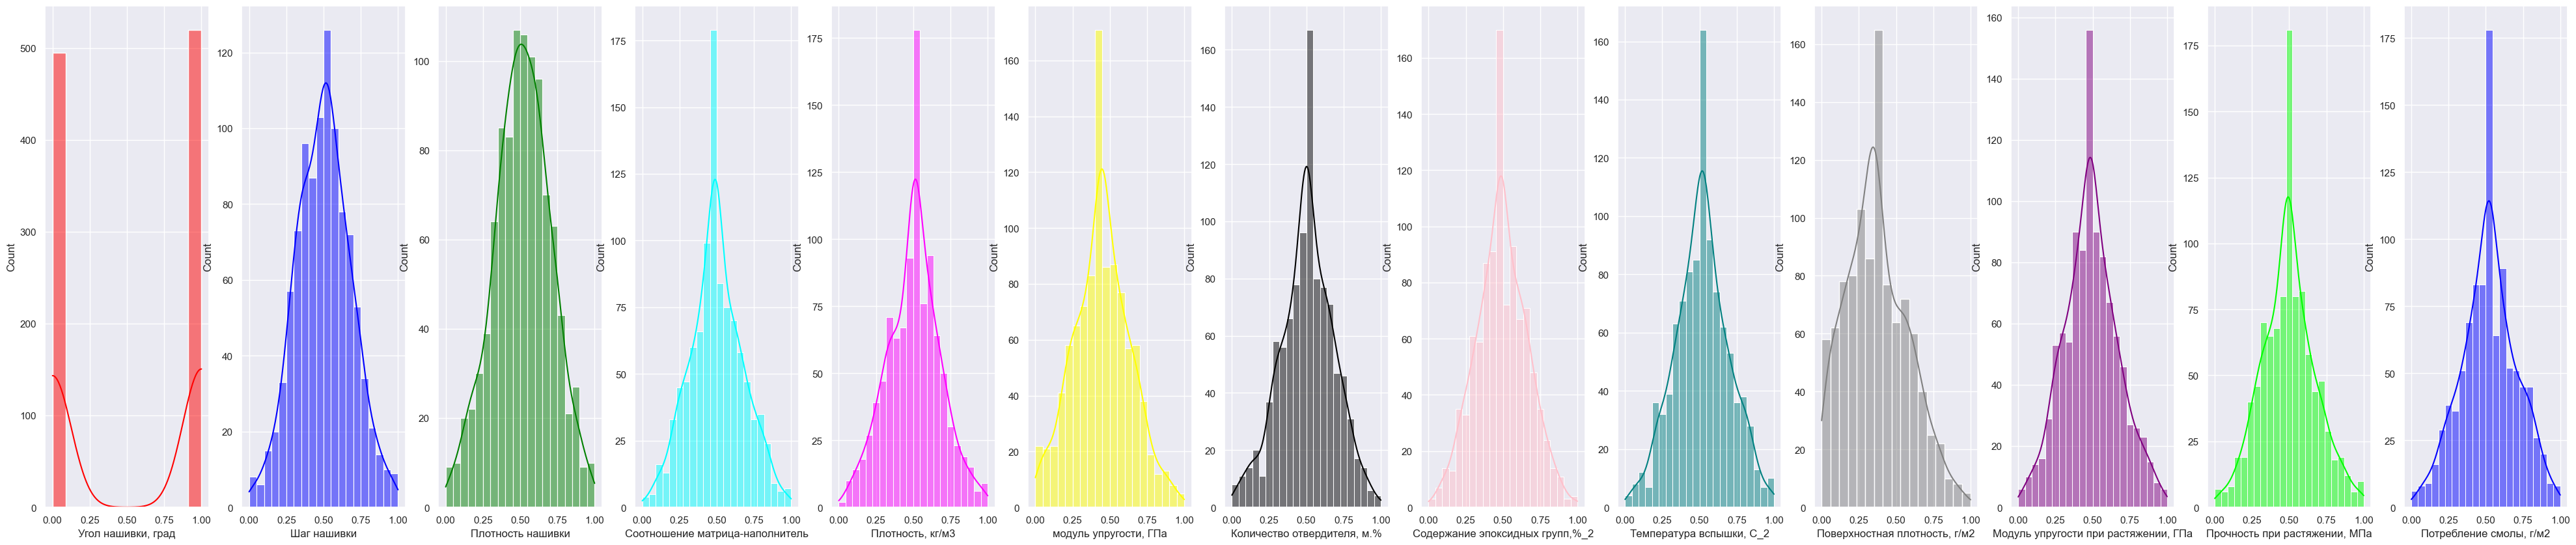

In [12]:
sns.set(style="darkgrid")
fig, axs = plt.subplots(1, 13, figsize=(50, 10))

sns.histplot(data=dataset_norm, x="Угол нашивки, град", kde=True, ax=axs[0], color='red')
sns.histplot(data=dataset_norm, x="Шаг нашивки", kde=True, ax=axs[1], color='blue')
sns.histplot(data=dataset_norm, x="Плотность нашивки", kde=True, ax=axs[2], color='green')
sns.histplot(data=dataset_norm, x="Соотношение матрица-наполнитель", kde=True, ax=axs[3], color='cyan')
sns.histplot(data=dataset_norm, x="Плотность, кг/м3", kde=True, ax=axs[4], color='magenta')
sns.histplot(data=dataset_norm, x="модуль упругости, ГПа", kde=True, ax=axs[5], color='yellow');
sns.histplot(data=dataset_norm, x="Количество отвердителя, м.%", kde=True, ax=axs[6], color='black');
sns.histplot(data=dataset_norm, x="Содержание эпоксидных групп,%_2", kde=True, ax=axs[7], color='pink');
sns.histplot(data=dataset_norm, x="Температура вспышки, С_2", kde=True, ax=axs[8], color='teal');
sns.histplot(data=dataset_norm, x="Поверхностная плотность, г/м2", kde=True, ax=axs[9], color='gray');
sns.histplot(data=dataset_norm, x="Модуль упругости при растяжении, ГПа", kde=True, ax=axs[10], color='purple');
sns.histplot(data=dataset_norm, x="Прочность при растяжении, МПа", kde=True, ax=axs[11], color='lime');
sns.histplot(data=dataset_norm, x="Потребление смолы, г/м2", kde=True, ax=axs[12], color='blue');

sns.histplot()



# Стандартизация объединённых данных методом StandartSceler

In [13]:
std_scaler=StandardScaler()
dataset_std=std_scaler.fit_transform(np.array(X_united_full[['Угол нашивки, град', 'Шаг нашивки', 'Плотность нашивки',
       'Соотношение матрица-наполнитель', 'Плотность, кг/м3',
       'модуль упругости, ГПа', 'Количество отвердителя, м.%',
       'Содержание эпоксидных групп,%_2', 'Температура вспышки, С_2',
       'Поверхностная плотность, г/м2', 'Модуль упругости при растяжении, ГПа',
       'Прочность при растяжении, МПа', 'Потребление смолы, г/м2']]))
dataset_std[:1] # Проверка нормализации
#Возвращение названия столбцов (преобразование обратно в датафрейм)
dataset_std=pd.DataFrame(data=dataset_std,columns=['Угол нашивки, град', 'Шаг нашивки', 'Плотность нашивки',
       'Соотношение матрица-наполнитель', 'Плотность, кг/м3',
       'модуль упругости, ГПа', 'Количество отвердителя, м.%',
       'Содержание эпоксидных групп,%_2', 'Температура вспышки, С_2',
       'Поверхностная плотность, г/м2', 'Модуль упругости при растяжении, ГПа',
       'Прочность при растяжении, МПа', 'Потребление смолы, г/м2'])
dataset_std.head()

,"Угол нашивки, град",Шаг нашивки,Плотность нашивки,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2"
0,-1.024941,-1.148475,-0.045697,-0.022525,0.043662,0.00143,0.006999,-0.009756,-0.000397,-0.086598,-0.014518,-0.019738,0.012882
1,-1.024941,-1.148475,0.221006,-1.243793,0.819669,0.00143,-2.347987,0.671229,-0.037650,-1.007512,-1.132511,1.197805,0.041913
2,-1.024941,-1.148475,1.110015,-0.022525,0.043662,0.00143,0.006999,-0.009756,-0.000397,-0.086598,-0.014518,-0.019738,0.012882
3,-1.024941,-0.750550,-0.934706,-1.243793,0.819669,0.00143,0.696265,-0.416407,0.369178,-1.007512,-1.132511,1.197805,0.041913
4,-1.024941,-0.750550,-0.045697,-0.178041,0.819669,0.04664,0.035778,0.026416,-0.037650,-1.007512,-1.132511,1.197805,0.041913


# Визуализация распределения объединённых данных после стандартизации

<Axes: xlabel='Потребление смолы, г/м2', ylabel='Count'>

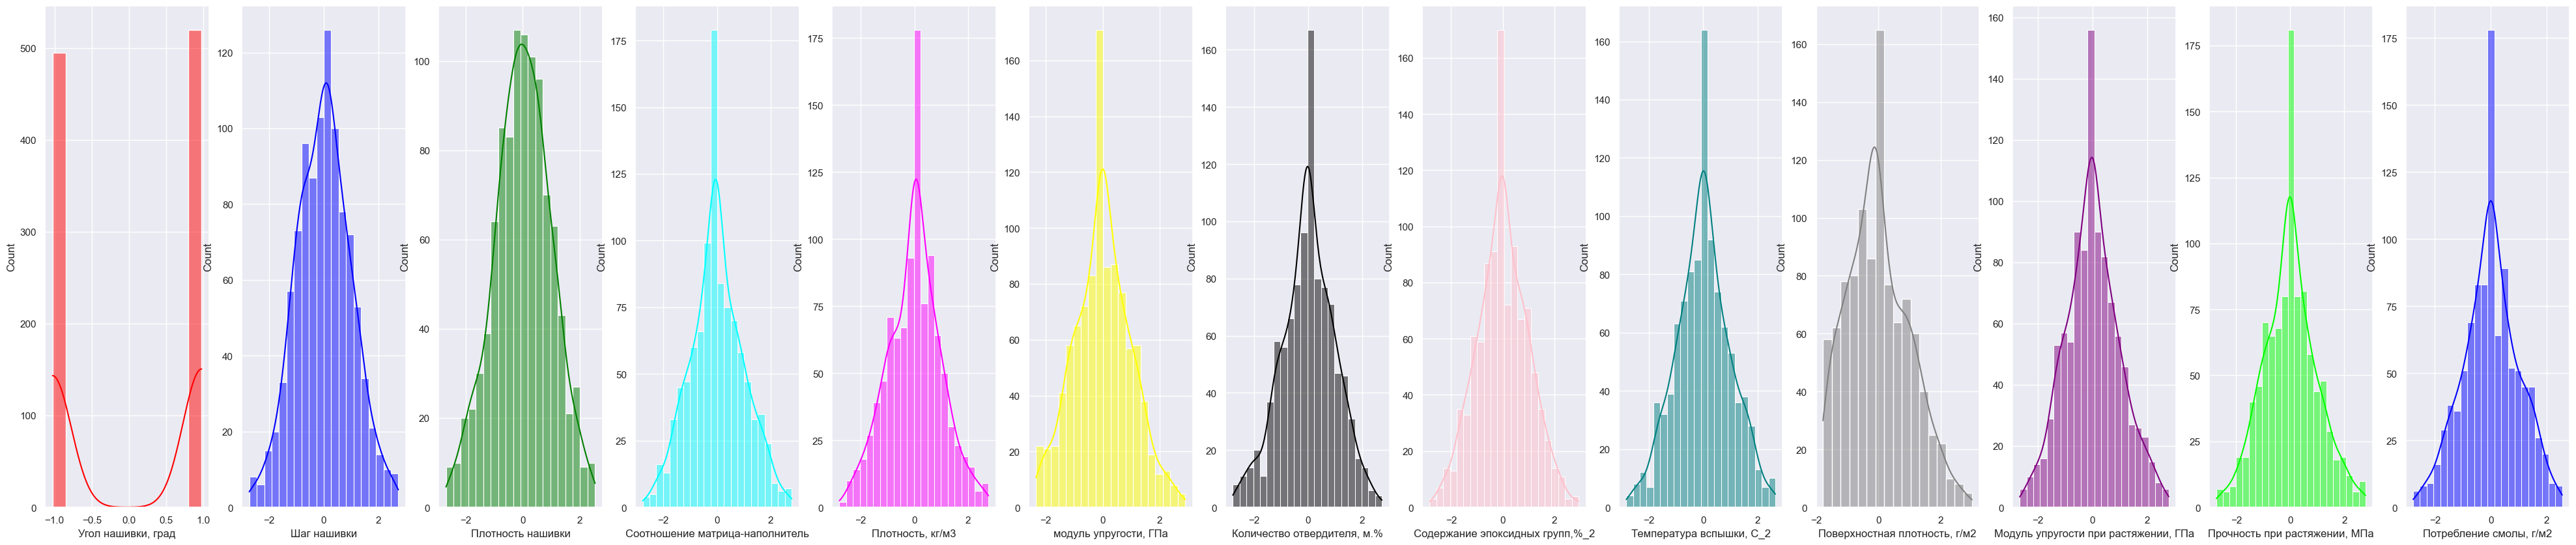

In [14]:
sns.set(style="darkgrid")
fig, axs = plt.subplots(1, 13, figsize=(50, 10))

sns.histplot(data=dataset_std, x="Угол нашивки, град", kde=True, ax=axs[0], color='red')
sns.histplot(data=dataset_std, x="Шаг нашивки", kde=True, ax=axs[1], color='blue')
sns.histplot(data=dataset_std, x="Плотность нашивки", kde=True, ax=axs[2], color='green')
sns.histplot(data=dataset_std, x="Соотношение матрица-наполнитель", kde=True, ax=axs[3], color='cyan')
sns.histplot(data=dataset_std, x="Плотность, кг/м3", kde=True, ax=axs[4], color='magenta')
sns.histplot(data=dataset_std, x="модуль упругости, ГПа", kde=True, ax=axs[5], color='yellow');
sns.histplot(data=dataset_std, x="Количество отвердителя, м.%", kde=True, ax=axs[6], color='black');
sns.histplot(data=dataset_std, x="Содержание эпоксидных групп,%_2", kde=True, ax=axs[7], color='pink');
sns.histplot(data=dataset_std, x="Температура вспышки, С_2", kde=True, ax=axs[8], color='teal');
sns.histplot(data=dataset_std, x="Поверхностная плотность, г/м2", kde=True, ax=axs[9], color='gray');
sns.histplot(data=dataset_std, x="Модуль упругости при растяжении, ГПа", kde=True, ax=axs[10], color='purple');
sns.histplot(data=dataset_std, x="Прочность при растяжении, МПа", kde=True, ax=axs[11], color='lime');
sns.histplot(data=dataset_std, x="Потребление смолы, г/м2", kde=True, ax=axs[12], color='blue');

sns.histplot()

# Корреляция после Нормализации

<Axes: >

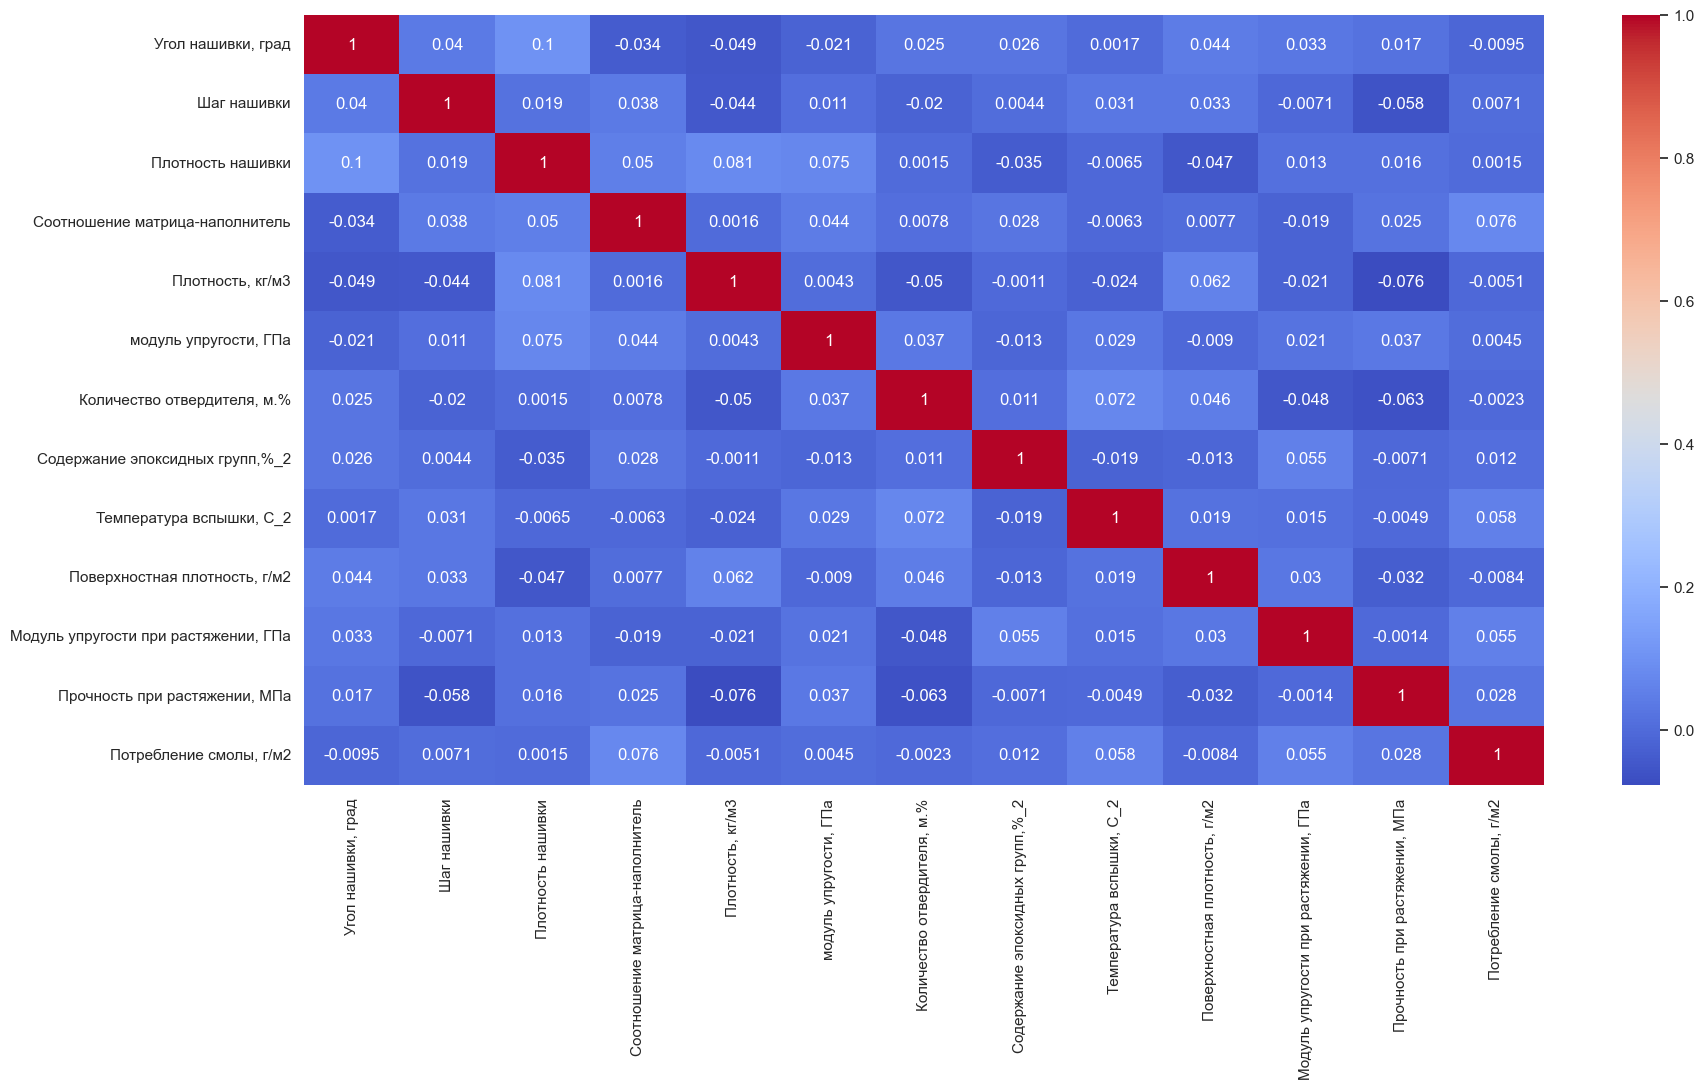

In [15]:
dataset_std.corr
plt.figure(figsize = (20, 10))
sns.heatmap(X_united_full.corr(), cmap = 'coolwarm',  cbar = True, annot=True)

# Выбор признаков для PCA Модуля упругости при растяжении

In [16]:
dataset_norm.corrwith(dataset_norm['Модуль упругости при растяжении, ГПа']).sort_values()

Количество отвердителя, м.%            -0.048216
Плотность, кг/м3                       -0.021368
Соотношение матрица-наполнитель        -0.019220
Шаг нашивки                            -0.007063
Прочность при растяжении, МПа          -0.001398
Плотность нашивки                       0.012814
Температура вспышки, С_2                0.015361
модуль упругости, ГПа                   0.021084
Поверхностная плотность, г/м2           0.029740
Угол нашивки, град                      0.032819
Потребление смолы, г/м2                 0.055006
Содержание эпоксидных групп,%_2         0.055282
Модуль упругости при растяжении, ГПа    1.000000
dtype: float64

In [17]:
features_Modul = [
    "Содержание эпоксидных групп,%_2",
    "Потребление смолы, г/м2",
    "Угол нашивки, град",
    "Поверхностная плотность, г/м2",
]

print("Correlation with Modul:\n")
print(dataset_norm[features_Modul].corrwith(dataset_norm['Модуль упругости при растяжении, ГПа']))

Correlation with Modul:

Содержание эпоксидных групп,%_2    0.055282
Потребление смолы, г/м2            0.055006
Угол нашивки, град                 0.032819
Поверхностная плотность, г/м2      0.029740
dtype: float64


In [18]:
X_modul = dataset_norm.copy()
y_Modul = X_modul.pop("Модуль упругости при растяжении, ГПа")
X_modul = X_modul.loc[:, features_Modul]

# PCA на плоскости двух главных компонент при исследовании модуля упругости при растяжении

Объяснённая дисперсия (доля): [0.69699602 0.12092201]
Собственные значения: [0.25022179 0.04341104]
Матрица нагрузок (компоненты):
 [[ 0.01002028 -0.00417532  0.99969688  0.02209766]
 [-0.03994883 -0.04013171 -0.02183081  0.99815678]]


<Axes: >

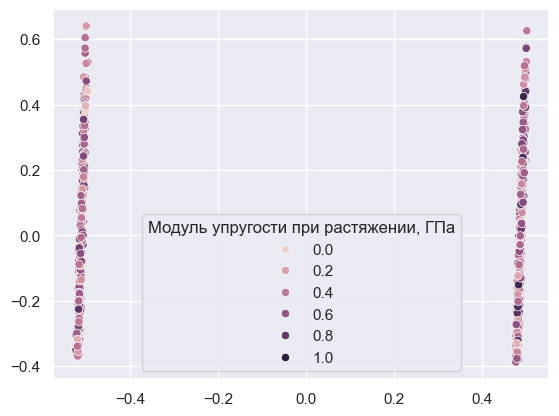

In [19]:
pca_modul_2=PCA(2)
X_pca_modul_2=pca_modul_2.fit_transform(X_modul)

print("Объяснённая дисперсия (доля):", pca_modul_2.explained_variance_ratio_)
print("Собственные значения:", pca_modul_2.explained_variance_)
print("Матрица нагрузок (компоненты):\n", pca_modul_2.components_)

sns.scatterplot(x=X_pca_modul_2[:, 0], y=X_pca_modul_2[:, 1], hue=y_Modul)

In [20]:
pca_modul=PCA()
X_pca_modul=pca_modul.fit_transform(X_modul)

component_names_modul = [f"PC{i+1}" for i in range(X_pca_modul.shape[1])]
X_pca_modul = pd.DataFrame(X_pca_modul, columns=component_names_modul)
# В loading записываем "смысловую нагрузку" компонент, их корреляцию с исходными
loadings_modul = pd.DataFrame(
    pca_modul.components_.T,
    columns=component_names_modul,
    index=X_modul.columns,
)

print(loadings_modul)
loadings_modul.to_excel('loadings_modul.xlsx', index=True)

                                      PC1       PC2       PC3       PC4
Содержание эпоксидных групп,%_2  0.010020 -0.039949  0.068533  0.996798
Потребление смолы, г/м2         -0.004175 -0.040132  0.996724 -0.070094
Угол нашивки, град               0.999697 -0.021831  0.002528 -0.011098
Поверхностная плотность, г/м2    0.022098  0.998157  0.042872  0.036834


# Дисперсия, объясняемая PCA, при изучении Модуля упругости при растяжении

[None, None]

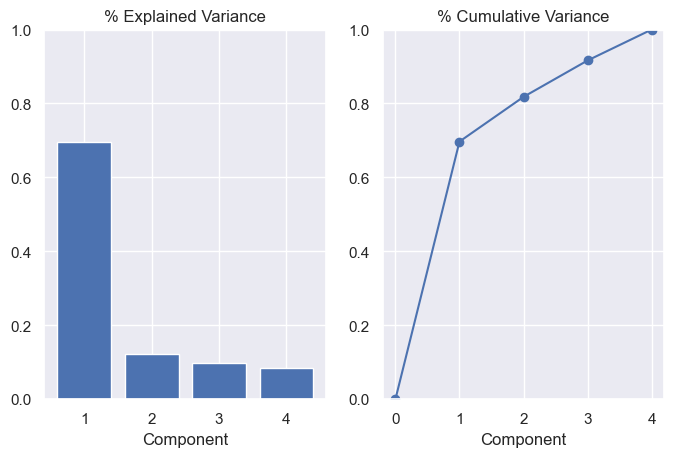

In [21]:
fig, axs = plt.subplots(1, 2)
n = pca_modul.n_components_
grid = np.arange(1, n + 1)

evr = pca_modul.explained_variance_ratio_ 
axs[0].bar(grid, evr)
axs[0].set(xlabel="Component", title="% Explained Variance", ylim=(0.0, 1.0))

# Кумулятивная дисперсия (variance)
cv = np.cumsum(evr) 
axs[1].plot(np.r_[0, grid], np.r_[0, cv], "o-")
axs[1].set(xlabel="Component", title="% Cumulative Variance", ylim=(0.0, 1.0))

fig.set(figwidth=8, dpi=100)

# Выбор признаков для PCA прочности при растяжении

In [22]:
dataset_norm.columns

Index(['Угол нашивки, град', 'Шаг нашивки', 'Плотность нашивки',
       'Соотношение матрица-наполнитель', 'Плотность, кг/м3',
       'модуль упругости, ГПа', 'Количество отвердителя, м.%',
       'Содержание эпоксидных групп,%_2', 'Температура вспышки, С_2',
       'Поверхностная плотность, г/м2', 'Модуль упругости при растяжении, ГПа',
       'Прочность при растяжении, МПа', 'Потребление смолы, г/м2'],
      dtype='object')

In [23]:
features_strength = [
        'Соотношение матрица-наполнитель', 'модуль упругости, ГПа', 'Потребление смолы, г/м2'
    ]

print("Correlation with Modul:\n")
print(dataset_norm[features_strength].corrwith(dataset_norm['Прочность при растяжении, МПа']))

Correlation with Modul:

Соотношение матрица-наполнитель    0.024525
модуль упругости, ГПа              0.036638
Потребление смолы, г/м2            0.027927
dtype: float64


In [24]:
X_strength = dataset_norm.copy()
y_strength = X_strength.pop("Прочность при растяжении, МПа")
X_strength = X_strength.loc[:, features_strength]

# PCA на плоскости двух главных компонент при исследовании Прочности при растяжении

Объяснённая дисперсия (доля): [0.36167787 0.34477247]
Собственные значения: [0.03779141 0.03602498]
Матрица нагрузок (компоненты):
 [[ 0.45222459  0.72384995  0.52108941]
 [ 0.23120749 -0.65941303  0.71534437]]


<Axes: >

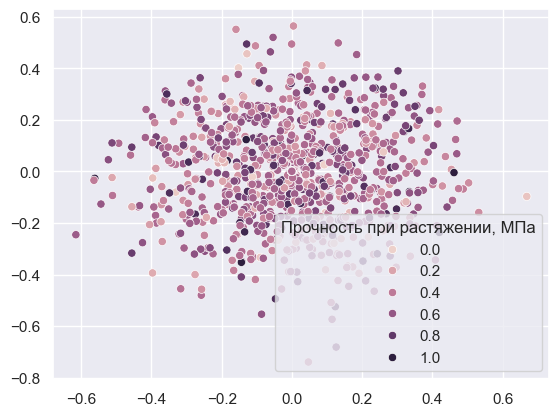

In [25]:
pca_strength=PCA(2)
X_pca_strength=pca_strength.fit_transform(X_strength)

print("Объяснённая дисперсия (доля):", pca_strength.explained_variance_ratio_)
print("Собственные значения:", pca_strength.explained_variance_)
print("Матрица нагрузок (компоненты):\n", pca_strength.components_)


sns.scatterplot(x=X_pca_strength[:, 0], y=X_pca_strength[:, 1], hue=y_strength)

In [26]:
pca_strength=PCA()
X_pca_strength=pca_strength.fit_transform(X_strength)

component_names_strength = [f"PC{i+1}" for i in range(X_pca_strength.shape[1])]
X_pca_strength = pd.DataFrame(X_pca_strength, columns=component_names_strength)
# В loading записываем "смысловую нагрузку" компонент, их корреляцию с исходными
loadings_strength = pd.DataFrame(
    pca_strength.components_.T,
    columns=component_names_strength,
    index=X_strength.columns,
)

print(loadings_strength)
loadings_strength.to_excel('loadings_strength.xlsx', index=True)

                                      PC1       PC2       PC3
Соотношение матрица-наполнитель  0.452225  0.231207  0.861415
модуль упругости, ГПа            0.723850 -0.659413 -0.203017
Потребление смолы, г/м2          0.521089  0.715344 -0.465562


# Дисперсия, объясняемая PCA, при изучении Прочности при растяжении

[None, None]

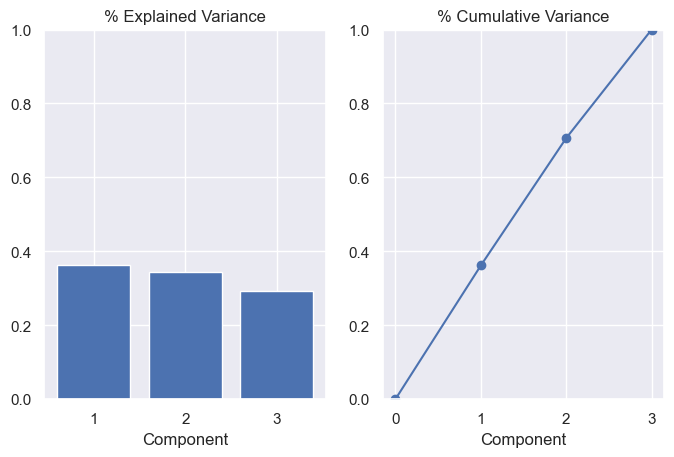

In [27]:
fig, axs = plt.subplots(1, 2)
n = pca_strength.n_components_
grid = np.arange(1, n + 1)

evr = pca_strength.explained_variance_ratio_ 
axs[0].bar(grid, evr)
axs[0].set(xlabel="Component", title="% Explained Variance", ylim=(0.0, 1.0))

# Кумулятивная дисперсия (variance)
cv = np.cumsum(evr) 
axs[1].plot(np.r_[0, grid], np.r_[0, cv], "o-")
axs[1].set(xlabel="Component", title="% Cumulative Variance", ylim=(0.0, 1.0))

fig.set(figwidth=8, dpi=100)

# Выбор признаков для PCA исследования Соотношения матрица-наполнитель

In [28]:
dataset_norm.columns

Index(['Угол нашивки, град', 'Шаг нашивки', 'Плотность нашивки',
       'Соотношение матрица-наполнитель', 'Плотность, кг/м3',
       'модуль упругости, ГПа', 'Количество отвердителя, м.%',
       'Содержание эпоксидных групп,%_2', 'Температура вспышки, С_2',
       'Поверхностная плотность, г/м2', 'Модуль упругости при растяжении, ГПа',
       'Прочность при растяжении, МПа', 'Потребление смолы, г/м2'],
      dtype='object')

In [29]:
features_matrix = [
        'Потребление смолы, г/м2', 'Плотность нашивки', 'модуль упругости, ГПа', 'Шаг нашивки'
    ]

print("Correlation with Modul:\n")
print(dataset_norm[features_matrix].corrwith(dataset_norm['Соотношение матрица-наполнитель']))

Correlation with Modul:

Потребление смолы, г/м2    0.075713
Плотность нашивки          0.050189
модуль упругости, ГПа      0.043885
Шаг нашивки                0.037749
dtype: float64


In [30]:
X_matrix = dataset_norm.copy()
y_matrix = X_matrix.pop("Соотношение матрица-наполнитель")
X_matrix = X_matrix.loc[:, features_matrix]

# PCA на плоскости двух главных компонент при исследовании Соотношения матрица-наполнитель

Объяснённая дисперсия (доля): [0.27770265 0.24821229]
Собственные значения: [0.03956952 0.03536747]
Матрица нагрузок (компоненты):
 [[ 0.04263541  0.7021158   0.69942771  0.12655633]
 [ 0.99084876 -0.06684818 -0.01435256  0.11637898]]


<Axes: >

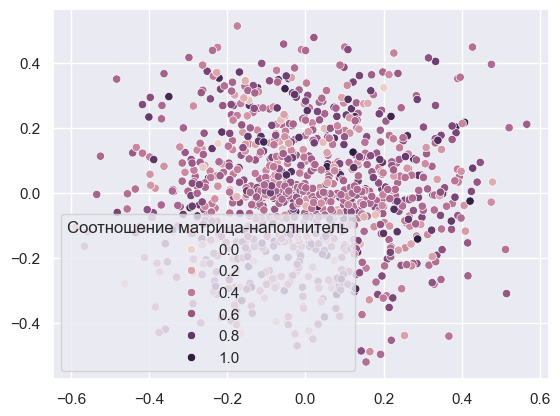

In [31]:
pca_matrix=PCA(2)
X_pca_matrix=pca_matrix.fit_transform(X_matrix)

print("Объяснённая дисперсия (доля):", pca_matrix.explained_variance_ratio_)
print("Собственные значения:", pca_matrix.explained_variance_)
print("Матрица нагрузок (компоненты):\n", pca_matrix.components_)


sns.scatterplot(x=X_pca_matrix[:, 0], y=X_pca_matrix[:, 1], hue=y_matrix)

In [32]:
pca_matrix=PCA()
X_pca_matrix=pca_matrix.fit_transform(X_matrix)

component_names_matrix = [f"PC{i+1}" for i in range(X_pca_matrix.shape[1])]
X_pca_matrix = pd.DataFrame(X_pca_matrix, columns=component_names_matrix)
# В loading записываем "смысловую нагрузку" компонент, их корреляцию с исходными
loadings_matrix = pd.DataFrame(
    pca_matrix.components_.T,
    columns=component_names_matrix,
    index=X_matrix.columns,
)

print(loadings_matrix)
loadings_matrix.to_excel('loadings_matrix.xlsx', index=True)

                              PC1       PC2       PC3       PC4
Потребление смолы, г/м2  0.042635  0.990849  0.015375 -0.127140
Плотность нашивки        0.702116 -0.066848 -0.611051 -0.359418
модуль упругости, ГПа    0.699428 -0.014353  0.684385  0.205456
Шаг нашивки              0.126556  0.116379 -0.397489  0.901356


# Дисперсия, объясняемая PCA, при изучении соотношения матрица-наполнитель

[None, None]

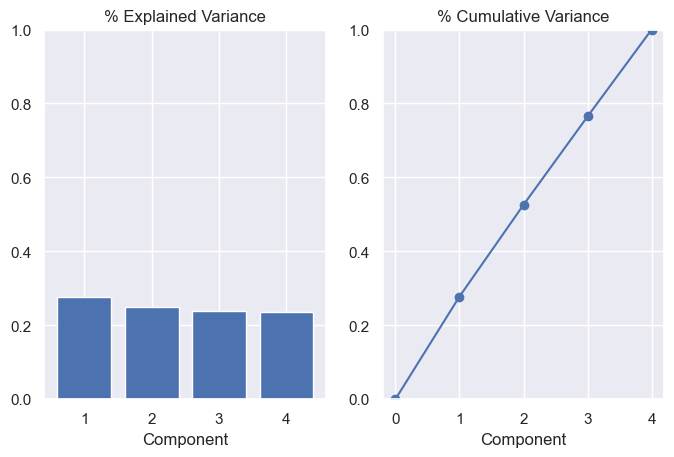

In [33]:
fig, axs = plt.subplots(1, 2)
n = pca_matrix.n_components_
grid = np.arange(1, n + 1)

evr = pca_matrix.explained_variance_ratio_ 
axs[0].bar(grid, evr)
axs[0].set(xlabel="Component", title="% Explained Variance", ylim=(0.0, 1.0))

# Кумулятивная дисперсия (variance)
cv = np.cumsum(evr) 
axs[1].plot(np.r_[0, grid], np.r_[0, cv], "o-")
axs[1].set(xlabel="Component", title="% Cumulative Variance", ylim=(0.0, 1.0))

fig.set(figwidth=8, dpi=100)